In [2]:
from IPython.display import Image

# Notes from MIT
Read more : http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L1.pdf

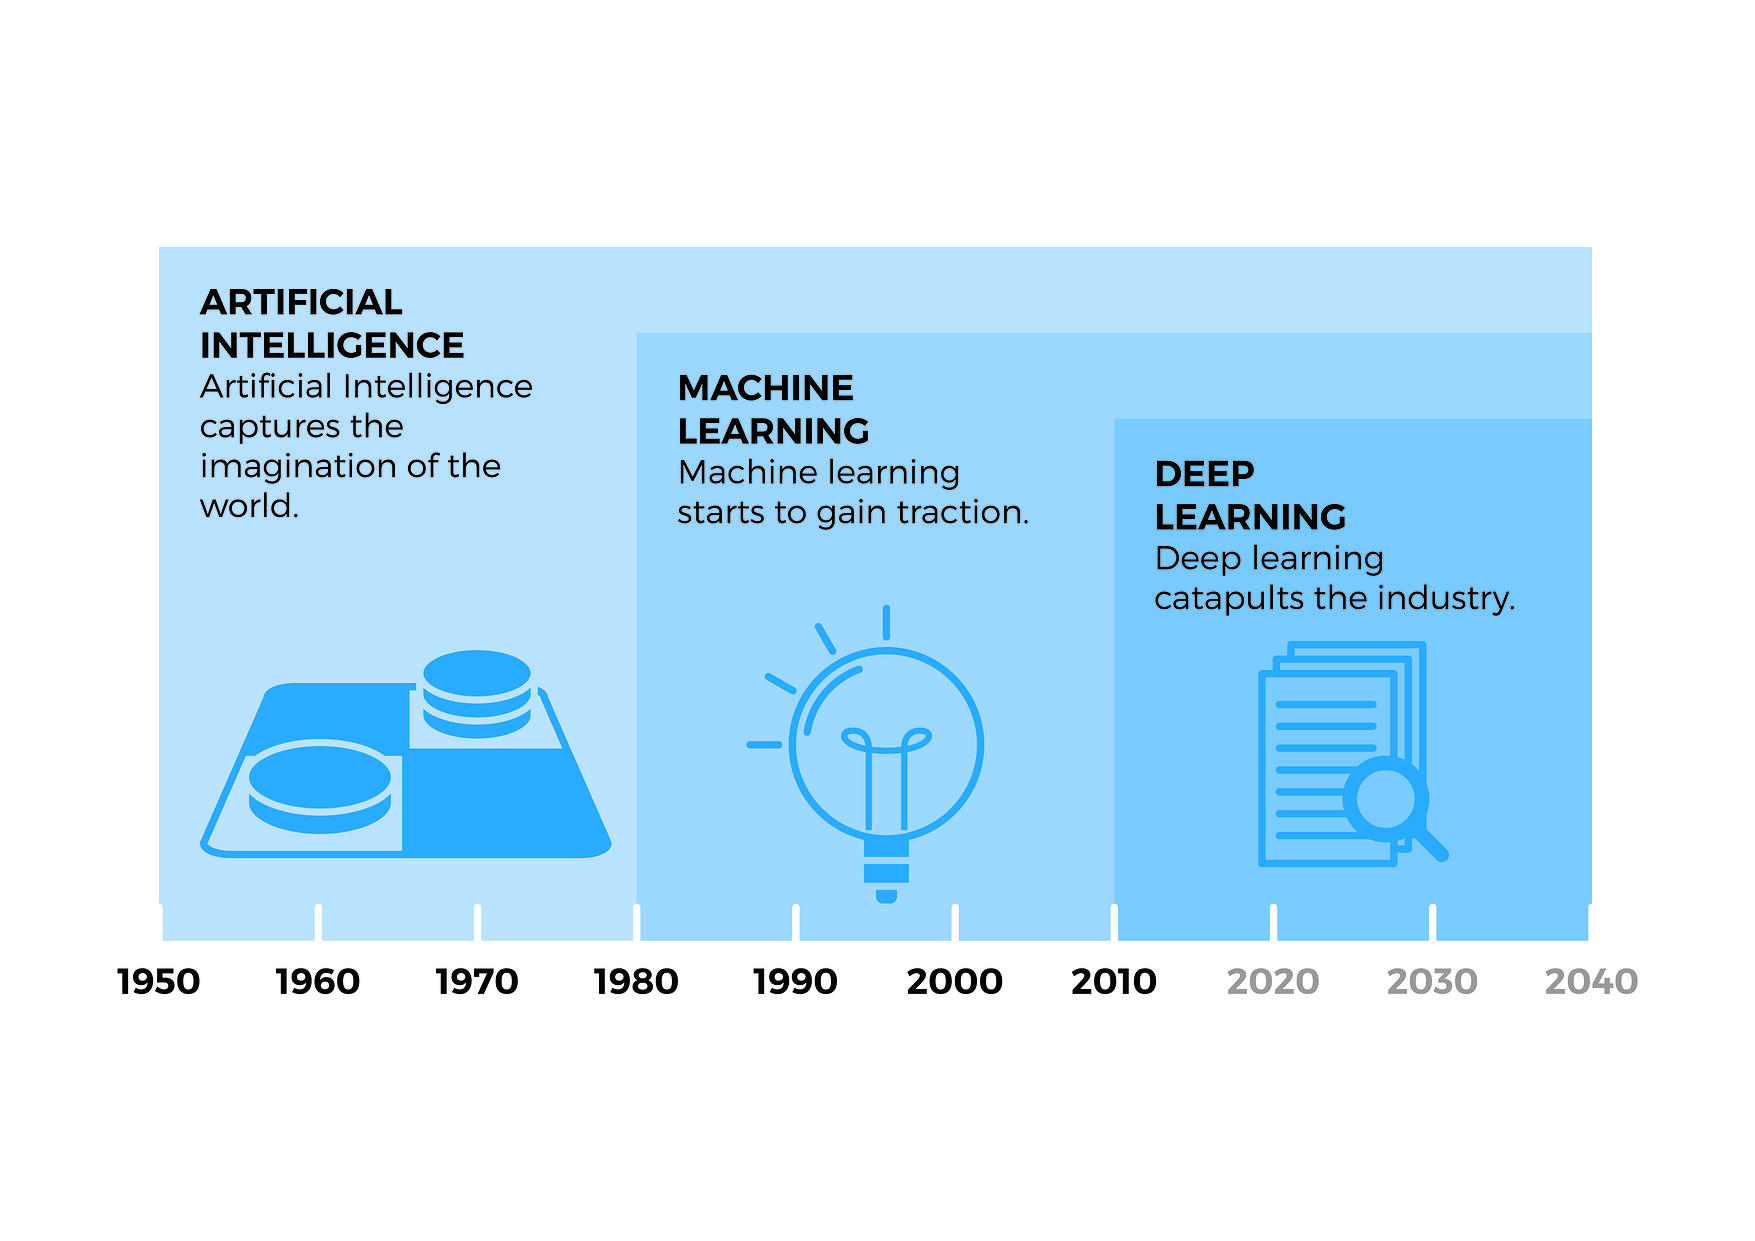

In [3]:

Image(filename="images/mladvance.jpg")

What is Deep learning

* Deep learning is an AI function that mimics the workings of the human brain in processing data for use in detecting objects, recognizing speech, translating languages, and making decisions.
* Deep learning AI is able to learn without human supervision, drawing from data that is both unstructured and unlabeled.
* Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised

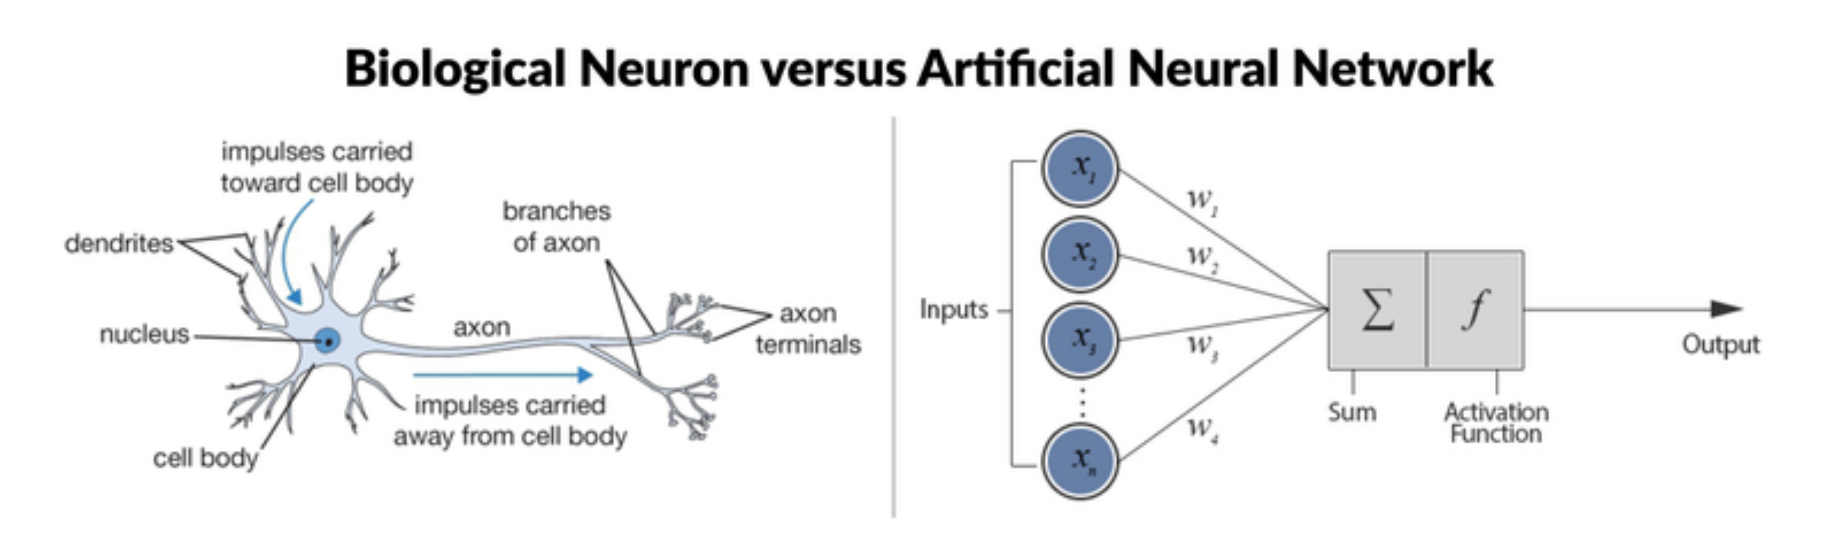

In [4]:
Image(filename="images/neuron2.png")


In biological brain we have individual cells called neurons, each neuron looks what other neuron looks at to what it’s neighbor has to say then it decides what it wants to say. In artificial neural network we have little mathematical functions we put them in some organised structure and then we say okay! you guys are all together to learn to do this task.

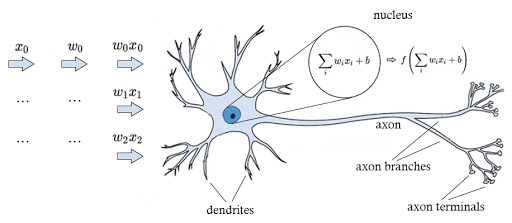

In [5]:

Image(filename="images/neuron.jpg")

# Application of Deep learning 
* Self Driving Cars.
* News Aggregation and Fraud News Detection.
* Deep Learning in Healthcare (Breast or Skin-Cancer diagnostics)
* Voice Search & Voice-Activated Assistants
* Visual Recognition.
* Fraud Detection.
* Automatic Machine Translation
* Automatic Text Generation

# ML & DS

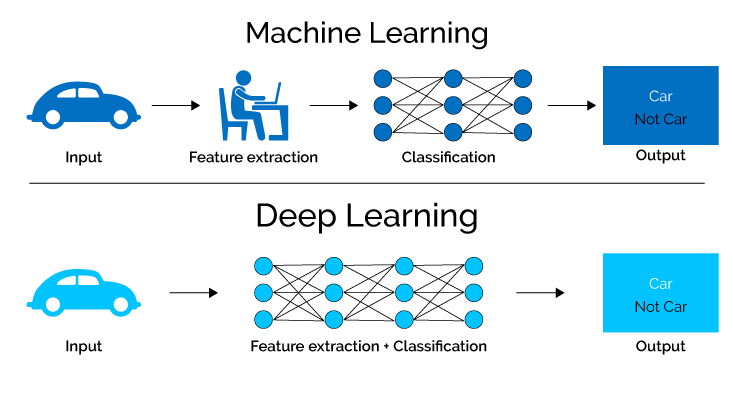

In [6]:
Image(filename="images/mldeep.png")

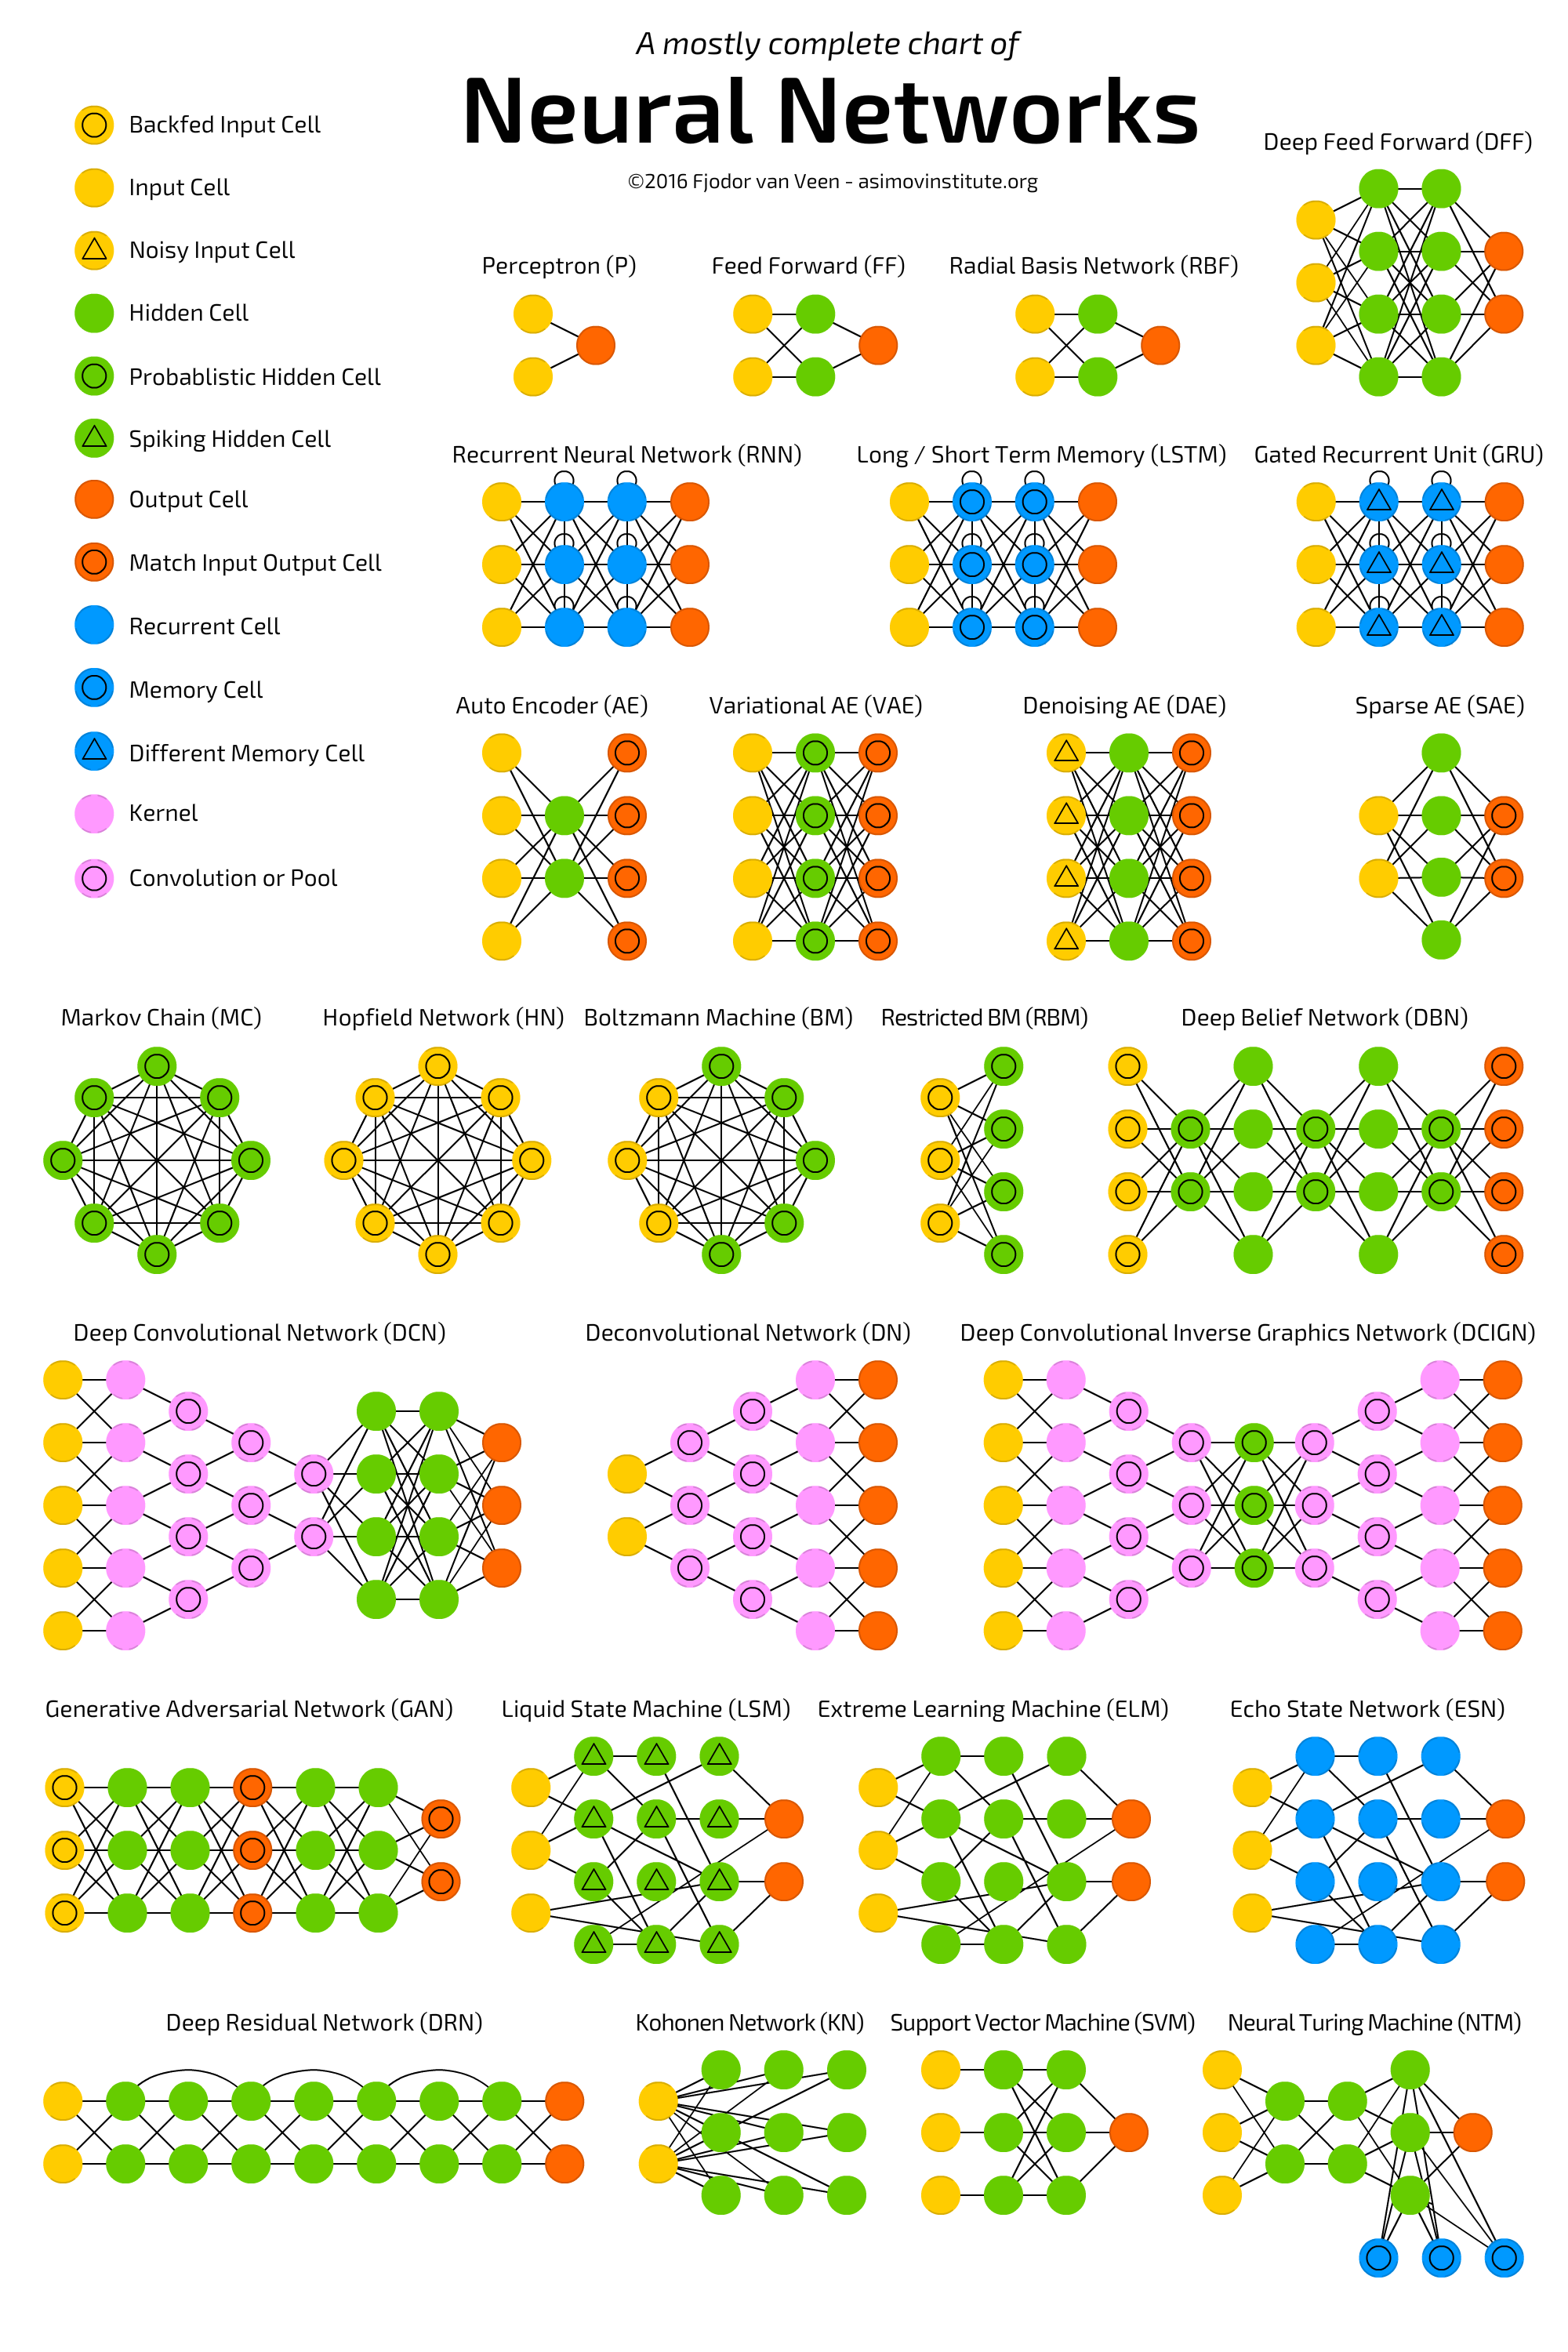

In [7]:
Image(filename="images/tpesofnetwork.png")

# TensorFlow 2.3

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

* Created by the Google Brain team
    
https://www.tensorflow.org/

# Keras

* Keras is an open-source neural-network library written in Python. 
* It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible
* https://keras.io/

##### Requires the latest pip
pip install --upgrade pip

##### Current stable release for CPU and GPU
pip install tensorflow

##### Or try the preview build (unstable)
pip install tf-nightly

* https://www.tensorflow.org/install

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# read data from csv
df = pd.read_csv('data/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# unnecessary columns
# create X and y

X = df.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = df['Exited']

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
# one hot endcoding 
X = pd.get_dummies(X, columns=['Geography','Gender'])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [9]:
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [10]:
# scale data 

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train.shape

(8000, 13)

In [12]:
X.shape[1]

13

In [13]:
# install  tensorflow 
#! pip install tensorflow

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input

In [15]:
#  stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential()

#eply connected neural network layer
model.add(Dense(1000, activation='relu', input_dim = X.shape[1]))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
%%time
model.compile(optimizer='adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

Wall time: 7.02 ms


In [17]:
#binary classifcation setup - sigmoid
#target values as 0 and 1 (binarized labels)
#model.add(Dense(1, activation = 'sigmoid'))

#multiclass classifcation setup - softmax (three classes) classes were 0, 1, 2
#loss - categorical_crossentropy for one hot encoded values or sparse_categorical_crossentropy for labels encoded values
#model.add(Dense(4, activation = 'softmax))

#regression setup - (not declared or explictied set to linear)
#loss - mse, mae
#model.add(Dense(1, activation = 'linear'))

In [18]:
%%time
model.fit(X_train, y_train.to_numpy(), batch_size = 20, epochs = 10, verbose = 1)

Epoch 1/10
400/400 [==============================] - 8s 19ms/step - loss: 0.4010 - accuracy: 0.8379
Epoch 2/10
400/400 [==============================] - 7s 19ms/step - loss: 0.3582 - accuracy: 0.8561
Epoch 3/10
400/400 [==============================] - 8s 19ms/step - loss: 0.3480 - accuracy: 0.8575
Epoch 4/10
400/400 [==============================] - 8s 19ms/step - loss: 0.3401 - accuracy: 0.8639
Epoch 5/10
400/400 [==============================] - 8s 20ms/step - loss: 0.3380 - accuracy: 0.8610
Epoch 6/10
400/400 [==============================] - 8s 19ms/step - loss: 0.3314 - accuracy: 0.8656
Epoch 7/10
400/400 [==============================] - 8s 19ms/step - loss: 0.3282 - accuracy: 0.8648
Epoch 8/10
400/400 [==============================] - 7s 19ms/step - loss: 0.3234 - accuracy: 0.8652
Epoch 9/10
400/400 [==============================] - 7s 19ms/step - loss: 0.3222 - accuracy: 0.8654
Epoch 10/10
400/400 [==============================] - 8s 19ms/step - loss: 0.3169 - accura

In [ ]:
### Predict 

In [19]:
y_pred = model.predict(X_test)

In [20]:
# sklearn - model.score(features, labels)

model.evaluate(X_test, y_test.to_numpy())

63/63 [==============================] - 1s 4ms/step - loss: 0.3680 - accuracy: 0.8505


[0.36802375316619873, 0.8504999876022339]

# vs RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.858